In [2]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline

sys.path.append('..')
from zwatershed import *
from visualization.visualize_funcs import *
from edgelist_methods import *

path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

start = time.clock()
threshes = [10,2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
out = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
rand = 0
p1, p2, p3 = 214, 180, 160  # 215, 214, 214 # 200, 200, 200

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)

nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)
print "\noriginal watershed..."
seg_one, segs_old, rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)

print rand
print "nsegs", len(np.unique(seg_one)),len(np.unique(segs_old[-1]))
print "\nnew watershed..."
seg_one_new, segs_new, rand_new = zwatershed_and_metrics_arb(gt, np.array(node1, dtype='uint32'), np.array(node2, dtype='uint32'),
                                       np.array(edge_affs), threshes, save_threshes)
print rand_new
print "nsegs", len(np.unique(seg_one_new)),len(np.unique(segs_new[-1]))

print "time: ", time.clock() - start


original watershed...
counts [1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
counts [1, 10, 10, 10, 10, 10, 10, 10, 10, 10]
{'V_Rand_merge': [0.9984975483444108, 0.9978441397747003], 'V_Rand_split': [0.6251905445567942, 0.8180379611102881], 'V_Rand': 0.8990389686745914}
nsegs 862 48

new watershed...
{'V_Rand_merge': [0.9984915540782536, 0.9978410952312058], 'V_Rand_split': [0.624216329223537, 0.8179389413081661], 'V_Rand': 0.8989779297086089}
nsegs 861 48
time:  1.273228


In [7]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520) (520, 520, 520, 3) (4, 72, 112)
(4, 72, 112) (4, 72, 112, 3) (4, 72, 112)
old num 318 new num 319


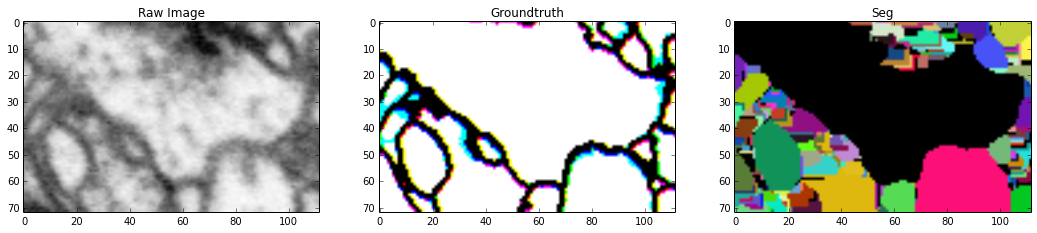

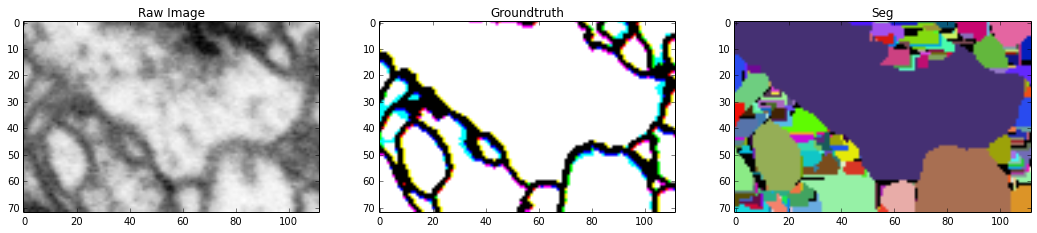

In [8]:
# view segs
seg_old = segs_old[0]#seg_one
seg_new = segs_new[0]
# im,label_set=trim(im,label_set,seg) 
# seg = seg.transpose((2, 1, 0)).reshape(shape).transpose((2, 1, 0))
print im.shape,label_set.shape,seg_new.shape
im,label_set=trim_arbitrary(im,label_set,seg_new) 
print im.shape,label_set.shape,seg_new.shape
print "old num",len(np.unique(seg_old)),"new num",len(np.unique(seg_new))
# display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)